# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Kamalini Pradhan

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [2]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

Package            Version
------------------ ----------
asttokens          2.4.1
certifi            2023.11.17
charset-normalizer 3.3.2
colorama           0.4.6
comm               0.2.2
contourpy          1.2.0
cycler             0.12.1
debugpy            1.8.1
decorator          5.1.1
docutils           0.20.1
executing          2.0.1
fonttools          4.47.2
idna               3.6
ipykernel          6.29.3
ipython            8.22.2
jedi               0.19.1
jupyter_client     8.6.1
jupyter_core       5.7.2
kiwisolver         1.4.5
matplotlib         3.8.2
matplotlib-inline  0.1.6
nest-asyncio       1.6.0
numpy              1.26.3
packaging          23.2
parso              0.8.3
pathlib            1.0.1
pillow             10.2.0
pip                24.0
platformdirs       4.2.0
prompt-toolkit     3.0.43
psutil             5.9.8
pure-eval          0.2.2
Pygments           2.17.2
pyparsing          3.1.1
python-dateutil    2.8.2
pywin32            306
pyzmq              25.1.2
setuptoo

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [2]:
import requests
from bs4 import BeautifulSoup
import pickle

# URL of the webpage
url = "https://hackaday.com/2021/03/22/how-laser-headlights-work/https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Send a GET request to fetch the webpage content
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find the main article content
    article_content = soup.find('div', class_='entry-content').text
    
    # Check if article content was found
    if article_content:
        # Dump the article content to a .pkl file
        with open('article_content.pkl', 'wb') as f:
            pickle.dump(article_content, f)
        
        print("Article content extracted and saved to 'article_content.pkl'")
    else:
        print("Article content not found on the webpage.")
else:
    print("Failed to fetch webpage. Status code:", response.status_code)


Article content extracted and saved to 'article_content.pkl'


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [3]:
import pickle
from bs4 import BeautifulSoup

# Read the HTML content from the .pkl file
with open('article_content.pkl', 'rb') as f:
    article_content = pickle.load(f)

# Convert the HTML content to a BeautifulSoup object
soup = BeautifulSoup(article_content, 'html.parser')

# Get the text from the BeautifulSoup object
article_text = soup.get_text()

# Print the text
print(article_text)



When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside of a very specific spot quite some distance away. Thankfully for our eyes, laser headlights don’t work in this w

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [12]:
import pickle
import spacy
from collections import Counter
import string

# Load the article text from the .pkl file
with open('article_content.pkl', 'rb') as f:
    article_content = pickle.load(f)

# Convert the article content to a string
article_text = str(article_content)

# Load the English language model in spaCy
nlp = spacy.load("en_core_web_sm")

# Process the article text with spaCy
doc = nlp(article_text)

# Filter out punctuation, stopwords, and whitespace
filtered_tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Count the frequencies of the tokens
token_frequencies = Counter(filtered_tokens)

# Determine the 5 most frequent tokens
most_common_tokens = token_frequencies.most_common(5)

# Print the 5 most frequent tokens with their frequencies
print("Most common tokens:")
for token, frequency in most_common_tokens:
    print(f"{token}: {frequency}")

# Print the tokens and their frequencies
print("\nToken frequencies:")
for token, frequency in token_frequencies.items():
    print(f"{token}: {frequency}")


Most common tokens:
laser: 30
headlights: 17
technology: 10
headlight: 10
led: 10

Token frequencies:
think: 1
onward: 1
march: 1
automotive: 6
technology: 10
headlights: 17
usually: 1
thing: 2
come: 5
mind: 3
engines: 1
fuel: 1
efficiency: 3
switch: 2
electric: 1
power: 3
mean: 1
thousands: 1
engineers: 2
world: 2
working: 1
improve: 1
state: 2
art: 1
lighting: 4
day: 2
sealed: 2
beam: 7
gave: 1
way: 4
modern: 2
designs: 3
regulations: 1
loosened: 1
bulbs: 1
moved: 2
simple: 3
halogens: 1
xenon: 1
hids: 1
recently: 1
leds: 6
new: 3
scene: 1
lasers: 5
laser: 30
bwm: 2
prototype: 1
headlight: 10
assemblies: 1
undergoing: 1
testing: 1
image: 2
brought: 1
phrase: 1
beams: 5
firing: 1
automobile: 1
obviously: 1
coherent: 1
monochromatic: 1
light: 8
poor: 1
illumination: 2
outside: 1
specific: 1
spot: 2
distance: 1
away: 1
thankfully: 2
eyes: 1
work: 1
instead: 1
consist: 1
solid: 1
diodes: 2
mounted: 1
inside: 3
blue: 1
fired: 1
yellow: 1
phosphor: 3
similar: 1
white: 2
produces: 1
powerfu

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [13]:
import pickle
import spacy
from collections import Counter

# Load the article text from the .pkl file
with open('article_content.pkl', 'rb') as f:
    article_content = pickle.load(f)

# Convert the article content to a string
article_text = str(article_content)

# Load the English language model in spaCy
nlp = spacy.load("en_core_web_sm")

# Process the article text with spaCy
doc = nlp(article_text)

# Filter out punctuation, stopwords, and whitespace, and get lemmas
filtered_lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Count the frequencies of the lemmas
lemma_frequencies = Counter(filtered_lemmas)

# Determine the 5 most frequent lemmas
most_common_lemmas = lemma_frequencies.most_common(5)

# Print the 5 most frequent lemmas with their frequencies
print("Most common lemmas:")
for lemma, frequency in most_common_lemmas:
    print(f"{lemma}: {frequency}")

# Print the lemmas and their frequencies
print("\nLemma frequencies:")
for lemma, frequency in lemma_frequencies.items():
    print(f"{lemma}: {frequency}")


Most common lemmas:
laser: 35
headlight: 26
beam: 12
technology: 10
light: 9

Lemma frequencies:
think: 1
onward: 1
march: 1
automotive: 6
technology: 10
headlight: 26
usually: 1
thing: 3
come: 7
mind: 3
engine: 1
fuel: 1
efficiency: 3
switch: 2
electric: 1
power: 3
mean: 2
thousand: 1
engineer: 2
world: 2
work: 2
improve: 1
state: 2
art: 1
lighting: 4
day: 3
seal: 1
beam: 12
give: 1
way: 4
modern: 2
design: 6
regulation: 1
loosen: 1
bulb: 1
move: 2
simple: 3
halogen: 1
xenon: 1
hids: 1
recently: 1
led: 7
new: 3
scene: 1
laser: 35
headlights: 1
bwm: 2
prototype: 1
assembly: 2
undergo: 1
testing: 1
image: 2
bring: 2
phrase: 1
fire: 2
automobile: 2
obviously: 1
coherent: 1
monochromatic: 1
light: 9
poor: 1
illumination: 2
outside: 1
specific: 1
spot: 2
distance: 1
away: 1
thankfully: 2
eye: 1
instead: 1
consist: 1
solid: 1
diode: 5
mount: 1
inside: 3
blue: 1
yellow: 1
phosphor: 3
similar: 1
white: 2
produce: 1
powerful: 2
vibrant: 1
bounce: 1
reflector: 1
road: 2
build: 2
benefit: 2
ener

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [14]:
def score_sentence_by_token(sentence, interesting_tokens):
    
    # Tokenize the sentence
    tokens = sentence.split()

    # Count the number of interesting tokens in the sentence
    interesting_token_count = sum(1 for token in tokens if token.lower() in interesting_tokens)

    # Calculate the score
    if len(tokens) > 0:
        score = interesting_token_count / len(tokens)
    else:
        score = 0.0

    return score


def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Process the sentence with spaCy
    doc = nlp(sentence)

    # Get the lemmas of the tokens in the sentence
    lemmas = [token.lemma_.lower() for token in doc]

    # Count the number of interesting lemmas in the sentence
    interesting_lemma_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)

    # Calculate the score
    if len(lemmas) > 0:
        score = interesting_lemma_count / len(lemmas)
    else:
        score = 0.0

    return score


first_sentence = article_text.split('.')[0]

# Score the first sentence by tokens
token_score = score_sentence_by_token(first_sentence, [token.lower() for token, _ in most_common_tokens])

# Score the first sentence by lemmas
lemma_score = score_sentence_by_lemma(first_sentence, [lemma.lower() for lemma, _ in most_common_lemmas])

# Print the scores
print("Score of the first sentence by tokens:", token_score)
print("Score of the first sentence by lemmas:", lemma_score)


Score of the first sentence by tokens: 0.05
Score of the first sentence by lemmas: 0.08695652173913043


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

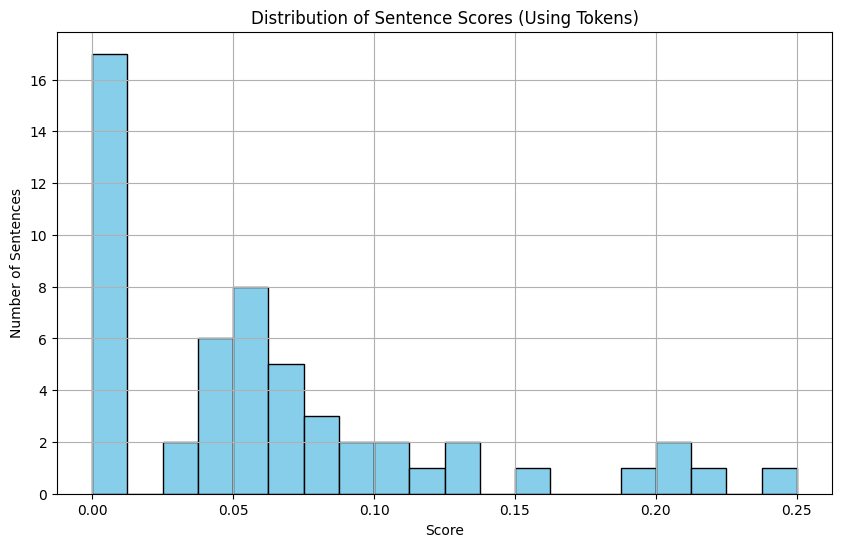

In [15]:
import matplotlib.pyplot as plt

# Function to calculate the score of each sentence in the article
def calculate_sentence_scores(article_text, interesting_tokens):
    # Split the article into sentences
    sentences = article_text.split('.')
    
    # Calculate the score for each sentence
    scores = [score_sentence_by_token(sentence, interesting_tokens) for sentence in sentences]
    
    return scores

# Calculate scores for every sentence in the article using tokens
sentence_scores = calculate_sentence_scores(article_text, [token.lower() for token, _ in most_common_tokens])

# Plot a histogram of the scores
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentence Scores (Using Tokens)')
plt.xlabel('Score')
plt.ylabel('Number of Sentences')
plt.grid(True)
plt.show()


7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

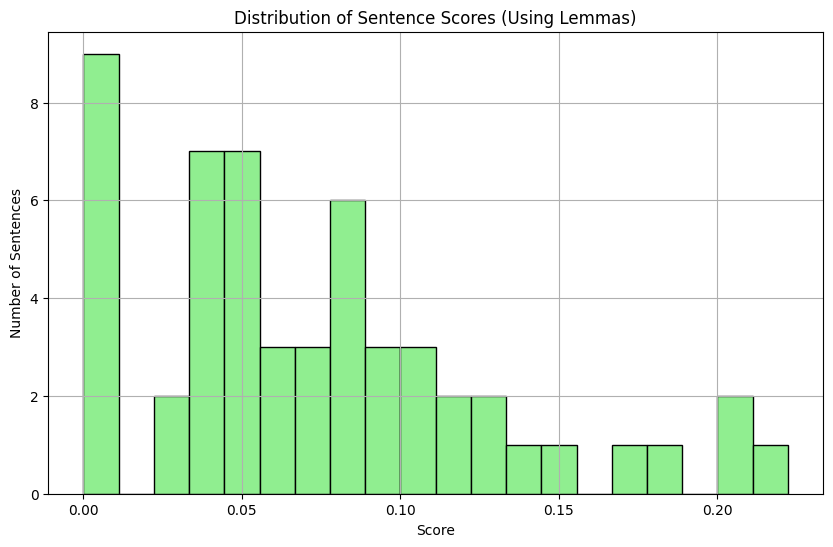

In [16]:
# Function to calculate the score of each sentence in the article using lemmas
def calculate_sentence_scores_by_lemma(article_text, interesting_lemmas):
    # Split the article into sentences
    sentences = article_text.split('.')
    
    # Calculate the score for each sentence
    scores = [score_sentence_by_lemma(sentence, interesting_lemmas) for sentence in sentences]
    
    return scores

# Calculate scores for every sentence in the article using lemmas
sentence_scores_by_lemma = calculate_sentence_scores_by_lemma(article_text, [lemma.lower() for lemma, _ in most_common_lemmas])

# Plot a histogram of the scores
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores_by_lemma, bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Sentence Scores (Using Lemmas)')
plt.xlabel('Score')
plt.ylabel('Number of Sentences')
plt.grid(True)
plt.show()


8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

In [19]:
def score_sentence_by_token(sentence, interesting_tokens):
    
    # Tokenize the sentence and process it with spaCy
    doc = nlp(sentence)

    # Filter out non-noun tokens and get the lowercase text
    tokens = [token.text.lower() for token in doc if token.pos_ == 'NOUN']

    # Count the number of interesting tokens in the sentence
    interesting_token_count = sum(1 for token in tokens if token in interesting_tokens)

    # Calculate the score
    if len(tokens) > 0:
        score = interesting_token_count / len(tokens)
    else:
        score = 0.0

    return score
def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Process the sentence with spaCy
    doc = nlp(sentence)

    # Get the lemmas of the tokens in the sentence and filter out non-noun lemmas
    lemmas = [token.lemma_.lower() for token in doc if token.pos_ == 'NOUN']

    # Count the number of interesting lemmas in the sentence
    interesting_lemma_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)

    # Calculate the score
    if len(lemmas) > 0:
        score = interesting_lemma_count / len(lemmas)
    else:
        score = 0.0

    return score

interesting_nouns_tokens = [token.lower() for token, _ in most_common_tokens if nlp(token)[0].pos_ == 'NOUN']
interesting_nouns_lemmas = [lemma.lower() for lemma, _ in most_common_lemmas if nlp(lemma)[0].pos_ == 'NOUN']

print(interesting_nouns_tokens)
print(interesting_nouns_lemmas)

lemma_score = score_sentence_by_lemma(article_text,interesting_nouns_lemmas)
token_score = score_sentence_by_token(article_text,interesting_nouns_tokens)

# Print the scores
print("Score of the first sentence by tokens:", token_score)
print("Score of the first sentence by lemmas:", lemma_score)


['laser', 'headlights', 'technology']
['laser', 'beam', 'technology']
Score of the first sentence by tokens: 0.1715210355987055
Score of the first sentence by lemmas: 0.17475728155339806
